In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras
import csv
import pandas as pd
import random
import numpy as np
from keras import regularizers
import re
from tqdm import tqdm_notebook
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
import nltk
nltk.download('wordnet')
import itertools
from string import ascii_lowercase
from functools import reduce
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
nltk.download('omw-1.4')
import pandas_datareader as pdr
import datetime
import yfinance as yf

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/projects/Stock NLP/Combined_News_DJIA.csv')
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [ ]:
df["CombNews"] = df[['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22']].agg(' '.join, axis=1)

In [ ]:
df.drop(columns=['Top1', 'Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'], axis=1, inplace=True)

In [ ]:
df.head()

,Date,Label,CombNews
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,1,b'All the experts admit that we should legalis...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1989 non-null   object
 1   Label     1989 non-null   int64 
 2   CombNews  1989 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.7+ KB


In [ ]:
df.isnull().sum()

Date        0
Label       0
CombNews    0
dtype: int64

In [ ]:
df.shape

(1989, 3)

In [ ]:
date_range = (df['Date'].min(), df['Date'].max())
date_range

('2008-08-08', '2016-07-01')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
y = df['Label'].values  
print(y[:5])

[0 1 0 0 1]


In [ ]:
type(y)

numpy.ndarray

Text(0, 0.5, 'Number of Comments')

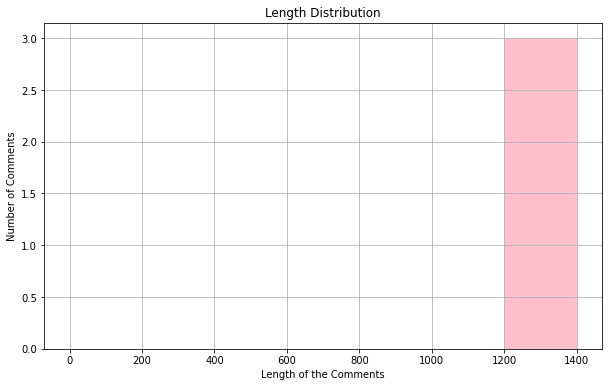

In [ ]:
lens=df['CombNews'].str.len()
resize = np.arange(0, 1500,200)
lens.hist(color='pink', figsize=(10, 6), bins=resize,width=200 )
plt.title('Length Distribution')
plt.xlabel('Length of the Comments')
plt.ylabel('Number of Comments')

In [ ]:
df['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [ ]:
def clean_text(text,remove_repeat_text=True, remove_patterns_text=True, is_lower=True):

  if is_lower:
    text=text.lower()
    
  # if remove_patterns_text:
  #   for target, patterns in RE_PATTERNS.items():
  #     for pat in patterns:
  #       text=str(text).replace(pat, target)

  if remove_repeat_text:
    text = re.sub(r'(.)\1{2,}', r'\1', text) 

  text = str(text).replace("\n", " ")
  text = re.sub(r'[^\w\s]',' ',text)
  text = re.sub('[0-9]',"",text)
  text = re.sub(" +", " ", text)
  text = re.sub("([^\x00-\x7F])+"," ",text)
  return text 

In [ ]:
train_texts = [] 
for line in tqdm_notebook(df['CombNews'], total=1989): 
    train_texts.append(clean_text(line))

<ipython-input-129-869962125b24>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(df['CombNews'], total=1989):


  0%|          | 0/1989 [00:00<?, ?it/s]

In [ ]:
lemmatizer= WordNetLemmatizer()
def lemma(text, lemmatization=True):
  output=''
  if lemmatization:
    text=text.split(' ')
    for word in text:
      word1 = lemmatizer.lemmatize(word, pos = "n") #noun 
      word2 = lemmatizer.lemmatize(word1, pos = "v") #verb
      word3 = lemmatizer.lemmatize(word2, pos = "a") #adjective
      word4 = lemmatizer.lemmatize(word3, pos = "r") #adverb
      output=output + " " + word4
  else:
    output=text
  
  return str(output.strip())

In [ ]:
lema_train_text=[]
for line in train_texts:
    lema_train_text.append(lemma(line))

In [ ]:
##Stopwords Removal

stopword_list=[]
def iter_all_strings():
    for size in itertools.count(1):
        for s in itertools.product(ascii_lowercase, repeat=size):
            yield "".join(s)

dual_alpha_list=[]
for s in iter_all_strings():
    dual_alpha_list.append(s)
    if s == 'zz':
        break

dual_alpha_list.remove('i')
dual_alpha_list.remove('a')
dual_alpha_list.remove('am')
dual_alpha_list.remove('an')
dual_alpha_list.remove('as')
dual_alpha_list.remove('at')
dual_alpha_list.remove('be')
dual_alpha_list.remove('by')
dual_alpha_list.remove('do')
dual_alpha_list.remove('go')
dual_alpha_list.remove('he')
dual_alpha_list.remove('hi')
dual_alpha_list.remove('if')
dual_alpha_list.remove('is')
dual_alpha_list.remove('in')
dual_alpha_list.remove('me')
dual_alpha_list.remove('my')
dual_alpha_list.remove('no')
dual_alpha_list.remove('of')
dual_alpha_list.remove('on')
dual_alpha_list.remove('or')
dual_alpha_list.remove('ok')
dual_alpha_list.remove('so')
dual_alpha_list.remove('to')
dual_alpha_list.remove('up')
dual_alpha_list.remove('us')
dual_alpha_list.remove('we')


for letter in dual_alpha_list:
    stopword_list.append(letter)

In [ ]:
print(stopword_list)
print(len(stopword_list))
print(len(lema_train_text))

['b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'ao', 'ap', 'aq', 'ar', 'au', 'av', 'aw', 'ax', 'ay', 'az', 'ba', 'bb', 'bc', 'bd', 'bf', 'bg', 'bh', 'bi', 'bj', 'bk', 'bl', 'bm', 'bn', 'bo', 'bp', 'bq', 'br', 'bs', 'bt', 'bu', 'bv', 'bw', 'bx', 'bz', 'ca', 'cb', 'cc', 'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'ck', 'cl', 'cm', 'cn', 'co', 'cp', 'cq', 'cr', 'cs', 'ct', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz', 'da', 'db', 'dc', 'dd', 'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'dl', 'dm', 'dn', 'dp', 'dq', 'dr', 'ds', 'dt', 'du', 'dv', 'dw', 'dx', 'dy', 'dz', 'ea', 'eb', 'ec', 'ed', 'ee', 'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'el', 'em', 'en', 'eo', 'ep', 'eq', 'er', 'es', 'et', 'eu', 'ev', 'ew', 'ex', 'ey', 'ez', 'fa', 'fb', 'fc', 'fd', 'fe', 'ff', 'fg', 'fh', 'fi', 'fj', 'fk', 'fl', 'fm', 'fn', 'fo', 'fp', 'fq', 'fr', 'fs', 'ft', 'fu', 'fv', 'fw', 'fx

In [ ]:
def search_stopwords(data, search_stop=True):
  output=""
  if search_stop:
    data=data.split(" ")
    for word in data:
      if not word in stopword_list:
        output=output+" "+word 
  else:
    output=data
  return str(output.strip())

potential_stopwords = []
for line in tqdm_notebook(lema_train_text, total=1989): 
    potential_stopwords.append(search_stopwords(line))
print(len(potential_stopwords))

def string_combine_a(stopword):
  final_a=""
  for item in range(1989):
    final_a=final_a+" "+stopword[item]
  return final_a

total_string_potential_a=string_combine_a(potential_stopwords)

def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

total_string_potential_a_dict=word_count(total_string_potential_a)

total_string_potential_a_df = pd.DataFrame(list(total_string_potential_a_dict.items()),columns = ['Word','Count'])

top50_potential_stopwords_a=total_string_potential_a_df.sort_values(by=['Count'],ascending=False).head(50)

<ipython-input-134-e135f2b2bc33>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(lema_train_text, total=1989):


  0%|          | 0/1989 [00:00<?, ?it/s]

1989


In [ ]:
#Looking for common terms in all top 50 dataframes.
common_potential_stopwords=list(reduce(set.intersection,map(set,[top50_potential_stopwords_a.Word])))
print(common_potential_stopwords)

['new', 'report', 'out', 'an', 'in', 'china', 'against', 'after', 'government', 'they', 'the', 'israeli', 'police', 'will', 'israel', 'say', 'and', 'at', 'on', 'have', 'a', 'than', 'one', 'for', 'he', 'by', 'people', 'war', 'up', 'russia', 'with', 'be', 'over', 'who', 'not', 'their', 'his', 'attack', 'kill', 'more', 'to', 'of', 'world', 'woman', 'year', 'country', 'that', 'state', 'find', 'from']


In [ ]:
potential_stopwords=['their','and']
for word in potential_stopwords:
    stopword_list.append(word)

In [ ]:
def remove_stopwords(text, remove_stop=True):
  output = ""
  if remove_stop:
    text=text.split(" ")
    for word in text:
      if word not in stopword_list:
        output=output + " " + word
  else :
    output=text

  return str(output.strip())

#Removing Stopwords from Train Data
processed_train_data = [] 
for line in tqdm_notebook(lema_train_text, total=1989): 
    processed_train_data.append(remove_stopwords(line))

<ipython-input-137-181585b208c4>:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(lema_train_text, total=1989):


  0%|          | 0/1989 [00:00<?, ?it/s]

In [ ]:
processed_train_data[:1]

['georgia down two russian warplane a country move to brink of war break musharraf to be impeach russia today column of troop roll into south ossetia footage from fight youtube russian tank be move towards the capital of south ossetia which reportedly be completely destroy by georgian artillery fire afghan child rap with impunity official say this be sick a three year old rap they do nothing russian tank have enter south ossetia whilst georgia shoot down two russian jet break georgia invade south ossetia russia warn would intervene on so side the enemy combatent trial be nothing but a sham salim haman be sentence to year but will be keep long anyway just because they feel like georgian troop retreat from osettain capital presumably leave several hundred people kill video do the prep georgia for war with russia rice give green light for israel to attack iran say no veto over israeli military ops announce class action lawsuit on behalf of american public against the fbi so russia georgia

In [ ]:
max_features=22363
maxpadlen = 1400          
val_split = 0.2      
embedding_dim_fasttext = 300

In [ ]:
#Tokenization
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(processed_train_data))
list_tokenized_train = tokenizer.texts_to_sequences(processed_train_data)

In [ ]:
#Indexing
word_index=tokenizer.word_index
print(len(word_index))

22363


In [ ]:
#padding
training_padded=pad_sequences(list_tokenized_train, maxlen=maxpadlen, padding = 'post')

In [ ]:
print('Tokenized sentences: \n', training_padded[10])
print('One hot label: \n', y[10])

Tokenized sentences: 
 [104  11 710 ...   0   0   0]
One hot label: 
 1


In [ ]:
embeddings_index_fasttext = {}
f = open('/content/drive/MyDrive/projects/Kaggle competition - jigsaw/wiki-news-300d-1M.vec', encoding='utf8')
for line in f:
    line.encode('utf-8').strip()
    values = line.split()
    word = values[0]
    embeddings_index_fasttext[word] = np.asarray(values[1:], dtype='float32')
f.close()
embedding_matrix_fasttext = np.random.random((len(word_index) + 1, embedding_dim_fasttext))
for word, i in word_index.items():
    embedding_vector = embeddings_index_fasttext.get(word)
    if embedding_vector is not None:
        embedding_matrix_fasttext[i] = embedding_vector

In [ ]:
MS = yf.Ticker("MSFT")
MS = MS.history(start='2008-01-01', end='2016-12-31')

In [ ]:
MS.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-01-02 00:00:00-05:00,26.274270,26.399069,25.694312,25.855820,63004200,0.0,0.0
2008-01-03 00:00:00-05:00,25.855814,26.171487,25.591529,25.965931,49599600,0.0,0.0
2008-01-04 00:00:00-05:00,25.833797,25.841139,25.026262,25.239159,72090800,0.0,0.0
2008-01-07 00:00:00-05:00,25.363953,25.547483,25.143716,25.408001,80164300,0.0,0.0
2008-01-08 00:00:00-05:00,25.481407,25.481407,24.519708,24.556414,79148300,0.0,0.0


In [ ]:
MS.drop(columns=['Dividends','Stock Splits'], axis=1, inplace=True)

In [ ]:
MS['Close'] = (MS['Close'] > MS['Open']).map({True: 1, False: 0})

In [ ]:
MS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2267 entries, 2008-01-02 00:00:00-05:00 to 2016-12-30 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2267 non-null   float64
 1   High    2267 non-null   float64
 2   Low     2267 non-null   float64
 3   Close   2267 non-null   int64  
 4   Volume  2267 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 170.8 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2008-08-08 to 2016-07-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     1989 non-null   int64 
 1   CombNews  1989 non-null   object
dtypes: int64(1), object(1)
memory usage: 46.6+ KB


In [ ]:
MS.index = MS.index.tz_convert(None)
MS.index = pd.DatetimeIndex(MS.index).normalize()

In [ ]:
df=df.set_index('Date')

In [ ]:
dates_to_keep = df.index.tolist()
MS = MS[MS.index.isin(dates_to_keep)]

In [ ]:
MS.shape

(1989, 5)

In [ ]:
df.shape

(1989, 2)

In [ ]:
MS.head()

,Open,High,Low,Close,Volume
Date,,,,,
2008-08-08,20.230484,20.881409,20.112134,1,80814100
2008-08-11,20.607725,21.007156,20.459787,1,68743800
2008-08-12,20.548555,20.977574,20.400616,1,62813000
2008-08-13,20.763064,21.081131,20.533761,0,51165200
2008-08-14,20.578142,20.918400,20.385823,1,49732300


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
stock_data = scaler.fit_transform(MS.drop(columns=['Close'], axis=1))

In [ ]:
x_train = [np.asarray(training_padded, dtype=float), stock_data]

In [ ]:
from keras.layers import Input, Concatenate, Dense
from keras.models import Model
text_input = Input(shape=(1400,), dtype='int32')
stock_input = Input(shape=(4,))

embedding = tf.keras.layers.Embedding(len(word_index) + 1,
                           embedding_dim_fasttext,
                           weights = [embedding_matrix_fasttext],
                           input_length = maxpadlen,
                           trainable=False,
                           name = 'embeddings')(text_input)

lstm = tf.keras.layers.LSTM(40,return_sequences=True, name='lstm_layer')(embedding)
globalmax = tf.keras.layers.GlobalMaxPooling1D()(lstm)
dropout = tf.keras.layers.Dropout(.1)(globalmax)
output = tf.keras.layers.Dense(20, activation='relu')(dropout)
model=Model(inputs=text_input, outputs=output)       

dense1=tf.keras.layers.Dense(64, activation='relu')(stock_input)
dropout1 = tf.keras.layers.Dropout(.1)(dense1)
dense2=tf.keras.layers.Dense(32, activation='relu')(dropout1)
dropout1 = tf.keras.layers.Dropout(.1)(dense2)
output1 = tf.keras.layers.Dense(16, activation='relu')(dropout1)
model1=Model(inputs=stock_input, outputs=output1)

concatenated = Concatenate()([model.output, model1.output])

z = Dense(2, activation="relu")(concatenated)
z = Dense(1, activation="sigmoid")(z)

In [ ]:
model = Model(inputs=[text_input, stock_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_train = [np.asarray(training_padded, dtype=float), stock_data]

In [ ]:
history=model.fit(x_train, [y,MS.Close.values], batch_size=32, epochs=10)

Epoch 1/10


AttributeError: ignored

In [ ]:
from keras.layers import Input, Concatenate, Dense
from keras.models import Model

text_input = Input(shape=(1400,), dtype='int32')
stock_input = Input(shape=(4,))

embedding = tf.keras.layers.Embedding(len(word_index) + 1,
                           embedding_dim_fasttext,
                           weights = [embedding_matrix_fasttext],
                           input_length = maxpadlen,
                           trainable=False,
                           name = 'embeddings')(text_input)

concatenated = Concatenate()([embedding, stock_input])

lstm = tf.keras.layers.LSTM(40,return_sequences=True, name='lstm_layer')(concatenated)
globalmax = tf.keras.layers.GlobalMaxPooling1D()(lstm)
dropout = tf.keras.layers.Dropout(.1)(globalmax)
output = tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(dropout)

ValueError: ignored